In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
  import xlrd
from  matplotlib.ticker import PercentFormatter
sns.set(color_codes=True)

In [ ]:
capData=pd.read_csv("Cab_Data.csv")
customer=pd.read_csv("Customer_ID.csv")
city=pd.read_csv("City.csv")
transaction=pd.read_csv("Transaction_ID.csv")

# Preparing Data

I merged the four Datasets in one dataset to be able to do queries on them. also I have added 4 new columns that I will be using through the investigating.


1.   years column:

    #includes the year in the transaction Date
2.   months column:

    #includes the month in the transaction Date
3.   Days column:

    #includes the days in the transaction Date
2.   profit column:

    #it is the profit that the company made after a specific trip 






In [ ]:
#we merge the datasets together in one dataset
data=capData.merge(right=transaction)
data=data.merge(right=customer)
data=data.merge(right=city)
#adjusting the date
data['Date of Travel'] = data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
#add a new columns called years,months,days
data['years']=pd.DatetimeIndex(data['Date of Travel']).year
data['months']=pd.DatetimeIndex(data['Date of Travel']).month
data['days']=pd.DatetimeIndex(data['Date of Travel']).day
#add a new column called profit (it is the profit during the trip)
data['profit']=data['Price Charged']-data['Cost of Trip']
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,years,months,days,profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,8,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,21,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,23,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,6,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,21,253.9808


investigating the average profit of the trip per year for each company 

In [ ]:
avg_profit_year=data.groupby(['years', 'Company']).mean()['profit']
avg_profit_year

years  Company   
2016   Pink Cab       68.321819
       Yellow Cab    169.347821
2017   Pink Cab       67.070839
       Yellow Cab    168.817057
2018   Pink Cab       53.229689
       Yellow Cab    143.416122
Name: profit, dtype: float64

**It appears that "yellow cap" has a higher average profit in the three years.**


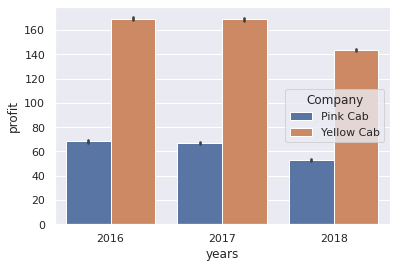

In [ ]:
sns.barplot(x=data['years'],y=data['profit'],hue=data['Company'],data=data)

# City Success
now we investigate the number of unique users for each company inside each city

In [ ]:
no_customer_city=data.groupby(['City','Company']).nunique()['Customer ID']
no_customer_city=no_customer_city.add_suffix(' ').reset_index()
no_customer_city

,City,Company,Customer ID
0,ATLANTA GA,Pink Cab,1322
1,ATLANTA GA,Yellow Cab,2595
2,AUSTIN TX,Pink Cab,1354
3,AUSTIN TX,Yellow Cab,1914
4,BOSTON MA,Pink Cab,2463
5,BOSTON MA,Yellow Cab,2997
6,CHICAGO IL,Pink Cab,2859
7,CHICAGO IL,Yellow Cab,3000
8,DALLAS TX,Pink Cab,1118
9,DALLAS TX,Yellow Cab,2564


**It appears that "yellow cap" has more customers in 16 cities while "pink cap" has more customers in just 3 Cities**


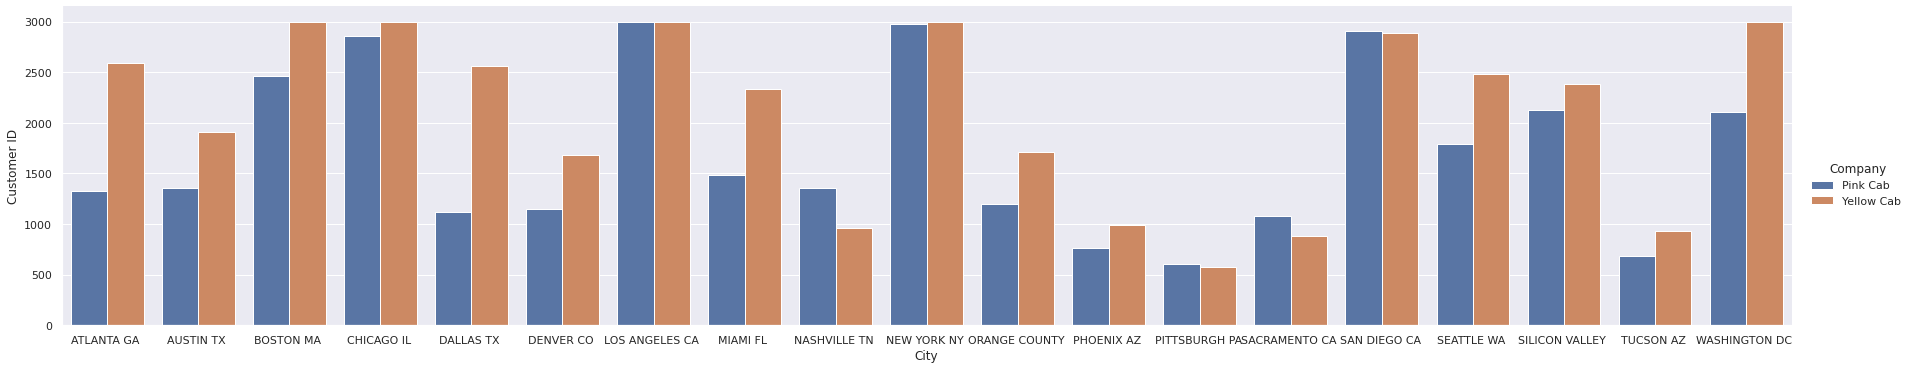

In [ ]:
sns.catplot(data=no_customer_city,x='City',y='Customer ID',hue="Company",kind='bar',aspect=5)

# trips depending on Date
we will see here the change in the number of trips depending on the date(**monthly** or daily )

In [ ]:
no_customer_year=data.groupby(['years','months','Company']).nunique()['Transaction ID']
no_customer_year=no_customer_year.reset_index()
no_customer_year

,years,months,Company,Transaction ID
0,2016,1,Pink Cab,927
1,2016,1,Yellow Cab,3719
2,2016,2,Pink Cab,1050
3,2016,2,Yellow Cab,4674
4,2016,3,Pink Cab,1231
...,...,...,...,...
67,2018,10,Yellow Cab,9727
68,2018,11,Pink Cab,3897
69,2018,11,Yellow Cab,11230
70,2018,12,Pink Cab,3800


** **bold text**Monthly**
both of them make more trips in the second half of the year more than the first half.

yellow cap has more trips in every month

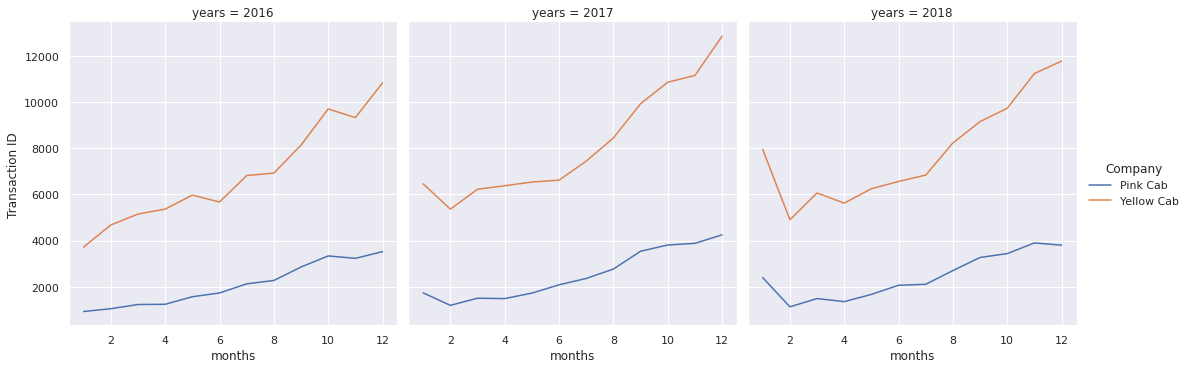

In [ ]:
sns.relplot(data=no_customer_year,x='months',y="Transaction ID",hue='Company',kind='line',col='years')

**Daily**
Both of them have low number of trips in the last days of the month and that is due to that most of the people get paid at the begining of the month

In [ ]:
no_transaction_day=data.groupby(['Company','days']).nunique()['Transaction ID']
no_transaction_day=no_transaction_day.reset_index()
no_transaction_day

,Company,days,Transaction ID
0,Pink Cab,1,2875
1,Pink Cab,2,2664
2,Pink Cab,3,3124
3,Pink Cab,4,2560
4,Pink Cab,5,3033
...,...,...,...
57,Yellow Cab,27,8911
58,Yellow Cab,28,8539
59,Yellow Cab,29,8863
60,Yellow Cab,30,8371


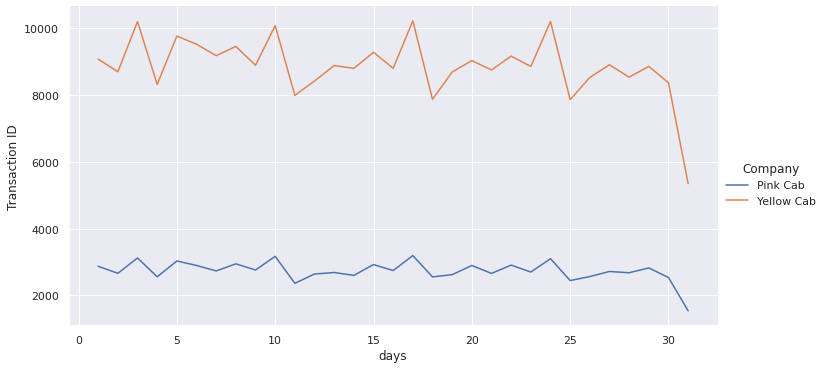

In [ ]:
sns.relplot(data=no_transaction_day,x='days',y="Transaction ID",hue='Company',kind='line',aspect=2)

In [ ]:
z=[]
x=data.groupby(["Company","Gender","years"]).count()['City']
x=x.reset_index()
y=x.groupby(['Company','years']).sum()['City']
y=y.reset_index()
for i in range(len(x['City'])):
  sum=0
  for j in range(len(y['City'])):
    if y['Company'][j]==x['Company'][i] and y['years'][j]==x['years'][i]:
         sum=y['City'][j]
  x['City'][i]=int((x['City'][i]/sum)*100)
x=x.rename(columns={'City':'Gender Ratio'})
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Company,Gender,years,Gender Ratio
0,Pink Cab,Female,2016,43
1,Pink Cab,Female,2017,44
2,Pink Cab,Female,2018,44
3,Pink Cab,Male,2016,56
4,Pink Cab,Male,2017,55
5,Pink Cab,Male,2018,55
6,Yellow Cab,Female,2016,41
7,Yellow Cab,Female,2017,42
8,Yellow Cab,Female,2018,42
9,Yellow Cab,Male,2016,58


#Gender Ratio 
gender ratio in each company per year

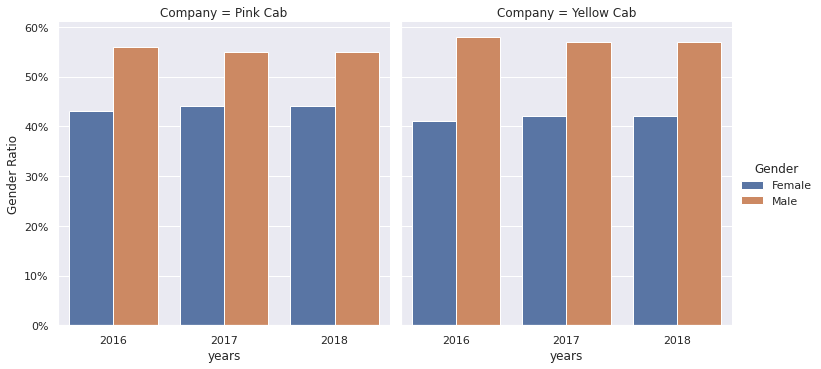

In [ ]:
g=sns.catplot(data=x,x="years",y='Gender Ratio',hue="Gender",col="Company",kind='bar')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

#Age GroupWise Profit


In [ ]:
specific_ages=data.groupby(['Company','Age']).sum()['profit']
specific_ages=specific_ages.reset_index()
specific_ages

,Company,Age,profit
0,Pink Cab,18,166558.4000
1,Pink Cab,19,182093.9100
2,Pink Cab,20,184770.9930
3,Pink Cab,21,162316.5280
4,Pink Cab,22,177174.6550
...,...,...,...
91,Yellow Cab,61,525286.6016
92,Yellow Cab,62,405650.0132
93,Yellow Cab,63,423724.9056
94,Yellow Cab,64,488370.4992


it appears that from age 40 or more make less profit in both company

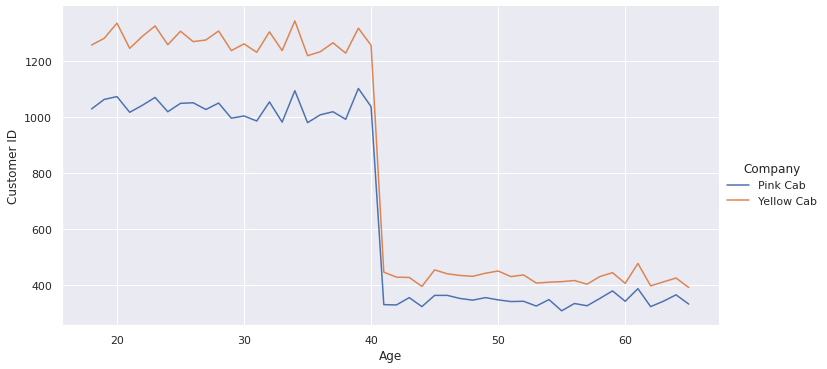

In [ ]:
sns.relplot(data=specific_ages,x='Age',y="Customer ID",hue='Company',kind='line',aspect=2)